In [2]:
from utils import *
from classes import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


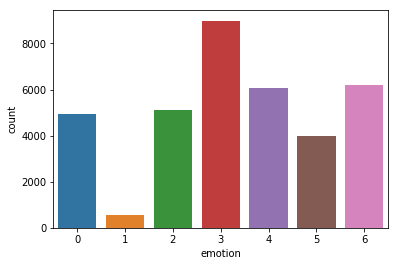

In [4]:
filename = "fer2013/fer2013.csv";
df = pd.read_csv(filename)
print(df.head())
sns.countplot(x='emotion',data=df)

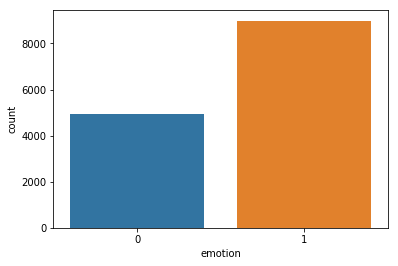

In [6]:
# We start out with applying CNN on two class labels:0 (Angry) and  3 (Happy)

binary = True  #read labels 3 and 4 only 
balance = False
if binary:
    df = df[(df['emotion']==3) | (df['emotion']==0)]
    df['emotion'] = df['emotion'].apply(lambda x: 0 if x == 0 else 1)
X = df['pixels']
y = df['emotion']
if balance:
    X, y = balanceClasses(X,y)
sns.countplot(x=y)


In [7]:
# The parseCNNInput takes (N,k) array and converts it into (N,c,sqrt(k),sqrt(k)) matrix for CNN. In this process, the pixel values are scaled to 0-1. 
X,y = parseCNNInput(X,y)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = CNN(architecture_params=
        {'pool_layer_sizes':[None, None, (20,5,5),None,None,(10,2,2)],
         'hidden_layer_sizes':[512,256,None,256,128,None], 
         'dropout_rates':[0.8, 0.5, 0.5,None,0.5,0.5,None]
        },
        hyper_params= {'mu': 0.945, 'decay': 0.9999945, 'lr': 0.0005, 'reg': 0.0005, 'eps': 0.001}
    )


('i:', 0, 'j:', 0, 'nb:', 338, 'cost:', 1.0748799, 'error rate:', 0.487)
('i:', 0, 'j:', 20, 'nb:', 338, 'cost:', 1.0030891, 'error rate:', 0.469)
('i:', 0, 'j:', 40, 'nb:', 338, 'cost:', 0.9786324, 'error rate:', 0.381)
('i:', 0, 'j:', 60, 'nb:', 338, 'cost:', 1.0003556, 'error rate:', 0.391)
('i:', 0, 'j:', 80, 'nb:', 338, 'cost:', 0.9739375, 'error rate:', 0.384)
('i:', 0, 'j:', 100, 'nb:', 338, 'cost:', 0.97578335, 'error rate:', 0.376)
('i:', 0, 'j:', 120, 'nb:', 338, 'cost:', 0.97923696, 'error rate:', 0.352)
('i:', 0, 'j:', 140, 'nb:', 338, 'cost:', 0.9779569, 'error rate:', 0.372)
('i:', 0, 'j:', 160, 'nb:', 338, 'cost:', 0.9607369, 'error rate:', 0.356)
('i:', 0, 'j:', 180, 'nb:', 338, 'cost:', 0.97290957, 'error rate:', 0.373)
('i:', 0, 'j:', 200, 'nb:', 338, 'cost:', 0.97634214, 'error rate:', 0.359)
('i:', 0, 'j:', 220, 'nb:', 338, 'cost:', 0.97655, 'error rate:', 0.359)
('i:', 0, 'j:', 240, 'nb:', 338, 'cost:', 0.96717846, 'error rate:', 0.359)
('i:', 0, 'j:', 260, 'nb:', 

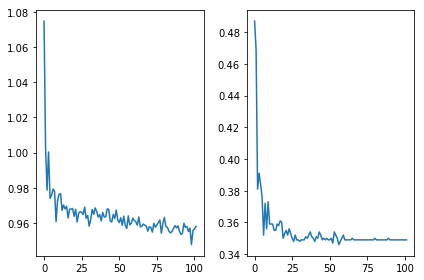

In [21]:
model.fit(X_train,y_train,batch_sz=30,epochs=6,debug=True)

In [23]:
pred = model.predict(X_test)
err = error_rate(pred,y_test)
print("test error: " + str(err))
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test,pred))


test error: 0.3535317318035138
[[   2  985]
 [   1 1801]]


             precision    recall  f1-score   support

          0       0.67      0.00      0.00       987
          1       0.65      1.00      0.79      1802

avg / total       0.65      0.65      0.51      2789

